In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from itertools import islice, cycle

from operator import itemgetter

In [4]:
N_CORES = 3
N_SLOTS = 10

In [48]:
data_dir = "data/topologies/ring4.txt"

with open(data_dir, "r") as f:
    topology = np.loadtxt(f, delimiter=";")
    
source_target = (topology[:, [0, 1]]).astype(int)
source_target = list(map(tuple, source_target))
weight = topology[:, 2]

In [50]:
topology[:, [0, 1]] - 1

array([[0., 1.],
       [1., 0.],
       [1., 2.],
       [2., 1.],
       [2., 3.],
       [3., 2.],
       [3., 0.],
       [0., 3.]])

In [6]:
fiber_data = dict(zip(source_target, [np.full((N_CORES, N_SLOTS), -1) for _ in range(len(source_target))]))
len(fiber_data)

40

In [7]:
fiber_data.keys()

dict_keys([(5, 1), (1, 5), (5, 2), (2, 5), (1, 8), (8, 1), (1, 6), (6, 1), (5, 6), (6, 5), (6, 3), (3, 6), (2, 3), (3, 2), (3, 7), (7, 3), (2, 7), (7, 2), (6, 4), (4, 6), (7, 4), (4, 7), (6, 8), (8, 6), (8, 4), (4, 8), (8, 10), (10, 8), (4, 10), (10, 4), (4, 11), (11, 4), (10, 11), (11, 10), (11, 12), (12, 11), (12, 9), (9, 12), (9, 10), (10, 9)])

In [63]:
#itemgetter((1, 2), (2, 1))(fiber_data)

In [64]:
#items_stack = np.stack(itemgetter((1, 2), (2, 1))(fiber_data))
#items_stack

In [65]:
#np.vsplit(items_stack, 2)

In [8]:
df_topo = pd.DataFrame(topology, columns=["source", "target", "weight"])
df_topo[["source", "target"]] = df_topo[["source", "target"]].astype(int) - 1
g = nx.from_pandas_edgelist(df_topo, source="source", target="target", edge_attr="weight")

In [9]:
pos = nx.spring_layout(g, seed=42)

In [14]:
np.int_(list(set(g.nodes)))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [200]:
colors = cycle(['r', 'g', 'b', 'y'])
def get_shortest_paths(s, t, k=1):
    return list(islice(nx.shortest_simple_paths(g, s, t, "weight"), k))

convert = lambda paths: [(paths[i], paths[i+1]) for i in range(len(paths) - 1)]

In [201]:
def draw_topology(g, pos, shortest_paths=[]):
    plt.figure(figsize=(5, 7.5))
    nx.draw_networkx_nodes(g, pos, node_size=1000)
    nx.draw_networkx_edges(g, pos,
                           edgelist=[(u, v) for (u, v, w) in g.edges(data=True)],
                           width=2)

    if len(shortest_paths) != 0:
        for i, path in enumerate(shortest_paths):
            edges = convert(path)
            print(f"SPATH #{i+1}: {edges}")
            nx.draw_networkx_edges(g, pos, edges, width=10, alpha=.5, edge_color=next(colors))

    nx.draw_networkx_labels(g, pos, font_size=15, font_color="white", font_weight="bold", font_family="sans-serif")
    edge_labels = nx.get_edge_attributes(g, "weight")
    nx.draw_networkx_edge_labels(g, pos, edge_labels)

    plt.axis("off")
    plt.tight_layout()
    plt.show()

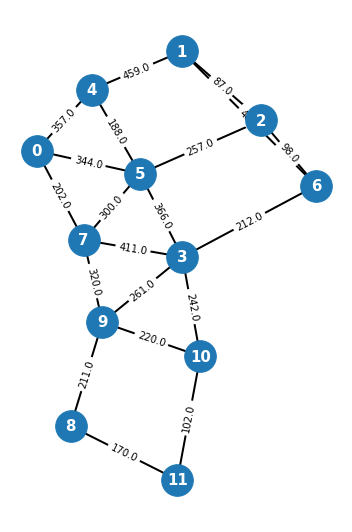

In [202]:
draw_topology(g, pos)

SPATH #1: [(11, 10), (10, 9), (9, 7), (7, 0)]
SPATH #2: [(11, 8), (8, 9), (9, 7), (7, 0)]
SPATH #3: [(11, 10), (10, 3), (3, 7), (7, 0)]


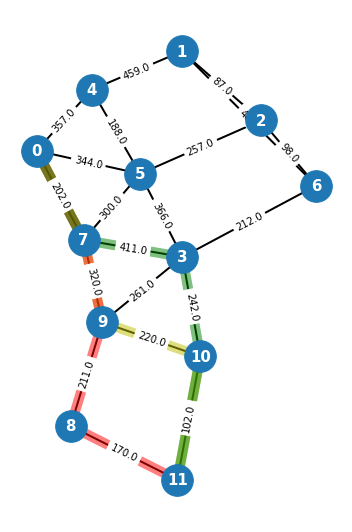

In [205]:
draw_topology(g, pos, shortest_paths=get_shortest_paths(11, 0, k=3))

SPATH #1: [(0, 7), (7, 9), (9, 10), (10, 11)]
SPATH #2: [(0, 7), (7, 9), (9, 8), (8, 11)]
SPATH #3: [(0, 7), (7, 3), (3, 10), (10, 11)]


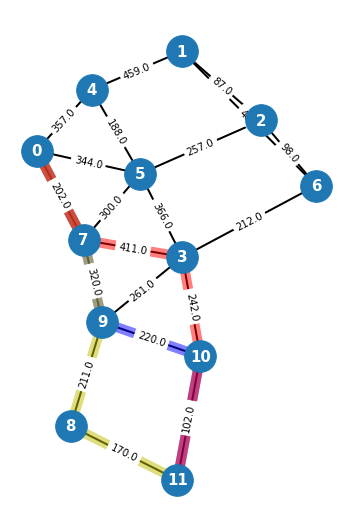

In [206]:
draw_topology(g, pos, shortest_paths=get_shortest_paths(0, 11, k=3))